# In-class Competition Tutorial
This NOTEBOOK will provide an introduction to the process of creating forecast results and the basic methodology.

First, let's review the task we will be performing (see README.ipynb for details).

**Objective**: To predict the probability of default based on customer data.

**Evaluation metric**: ROC-AUC (Area Under the Receiver Operating Characteristic Curve)

## Contents
- [1.Setup](#scrollTo=a5KcDAE8CnmB)
- [2.Loading the Data](#scrollTo=tp0cW0CD11Hi&line=1&uniqifier=1)
- [3.Visualizing and Understanding the Data](#scrollTo=3NuP1zcmCnmF&line=1&uniqifier=1)
- [4.Preprocessing and Feature Creation](#scrollTo=rsPYkguwCnmO&line=1&uniqifier=1)
- [5.Building the Machine Learning Model](#scrollTo=FoKdK60PCnmP&line=1&uniqifier=1)
- [6.Creating prediction results](#scrollTo=tn_kdvWYCnmQ&line=2&uniqifier=1)

## 1.Setup

### 1.1 Import Libraries
Let's load basic libraries.
Other required libraries will be loaded when we explain them.
- numpy: Library for efficient numerical computation
- pandas: Library useful for data analysis
- matplotlib: Graph drawing library
- seaborn: Graph drawing library as well

In [14]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1.2 Connect with Google Drive
To load the data, we first need to connect this Colab notebook with Google Drive.

In [15]:
# If you work with Google Colaboratory, please run this as well.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next, we need to navigate to where the `competition` folder is located

**IMPORTANT**:<br>
Change the path in the `%cd` command below to match the folder where this notebook is saved on Google Drive by **replacing "WhereThisNotebookIsLocated" with your actual folder path**.

Examples:
- You uploaded `competition` folder directly under MyDrive (the default folder when you open Google Drive)
    - Change to "/<wbr>content/drive/MyDrive/competition"
- You uploaded `competition` folder inside a folder named `00_GCIGlobal` under MyDrive
    - Change to "/<wbr>content/drive/MyDrive/00_GCIGlobal/competition"

You can easily locate your notebook's directory by:
1. Open the Files panel on the left side of Colab
2. Navigate through the "drive" and "MyDrive" folders until you find your notebook's folders
3. Click the more actions icon (three vertical dots, $\vdots$) next to the folder name
4. Select the option "Copy path"

In [16]:
# Specify the directory where this notebook is located after %cd.
%cd "/content/drive/MyDrive/Documents/GCI/competition"

/content/drive/MyDrive/Documents/GCI/competition


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


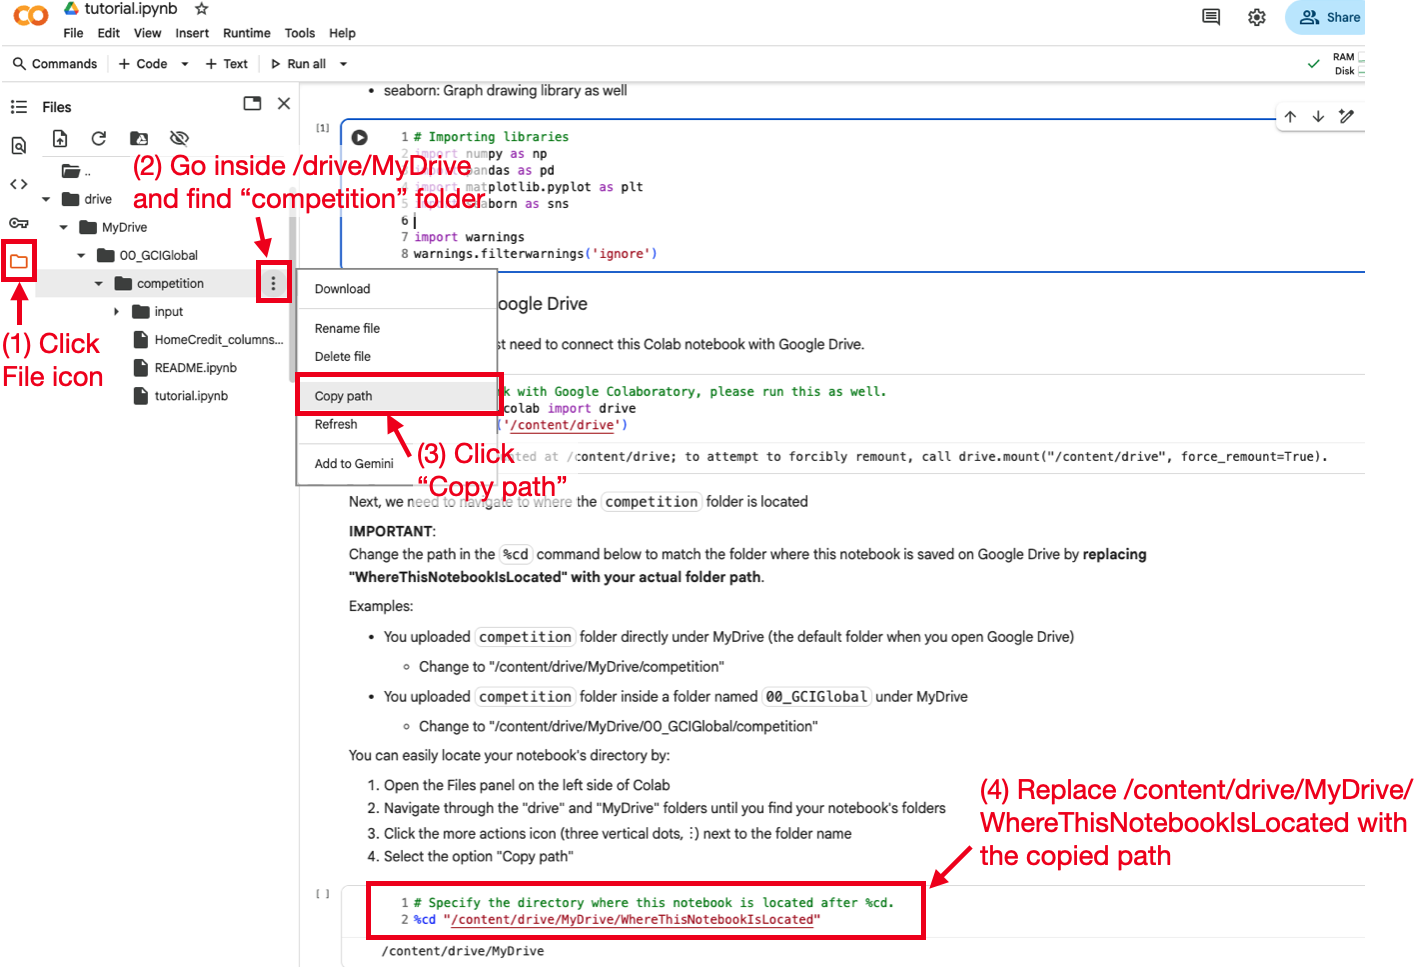

Run the cell below to check if the path is correctly set.

In [18]:
import os
from pathlib import Path

# Automatically get the current working directory
current_dir = Path(os.getcwd())

# Define file paths using pathlib
train_file = current_dir / "input" / "train.csv"
test_file = current_dir / "input" / "test.csv"
sample_sub_file = current_dir / "input" / "sample_submission.csv"

# Check if path exists
if train_file.exists() and test_file.exists() and sample_sub_file.exists():
    print("All files exist and path is correctly set.")
else:
    print("Some files are missing or path is not correctly set.")

All files exist and path is correctly set.


## 2.Loading the Data

### 2.1 Data Overview
Run the cell to load the dataset as `pd.DataFrame`.

**IMPORTANT:**<br>
**When you make modifications to preprocessing or model training, always make sure to run all cells from this cell.**

In [19]:
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
sample_sub = pd.read_csv(sample_sub_file)

Before conducting a full-scale analysis, we will first review a brief overview of the data.

In [20]:
# Check train data
print(f"train shape: {train.shape}")
train.head(3)

train shape: (171202, 34)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,0,Cash loans,F,0,112500.0,755190.0,36328.5,675000.0,Working,Higher education,...,School,NaN,0.372591,NaN,-292.0,NaN,NaN,NaN,NaN,0
1,1,Cash loans,F,0,225000.0,585000.0,16893.0,585000.0,Pensioner,Secondary / secondary special,...,XNA,NaN,0.449567,0.553165,-617.0,0.0,0.0,0.0,1.0,0
2,2,Cash loans,F,0,54000.0,334152.0,18256.5,270000.0,State servant,Secondary / secondary special,...,Postal,NaN,0.569503,NaN,-542.0,NaN,NaN,NaN,NaN,0


In [21]:
# Check test data
print(f"test shape: {test.shape}")
test.head(3)

test shape: (61500, 33)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,171202,Cash loans,F,1,144000.0,961146.0,28233.0,688500.0,Working,Higher education,...,2,Kindergarten,NaN,0.720416,NaN,-1.0,NaN,NaN,NaN,NaN
1,171203,Cash loans,F,0,103500.0,296280.0,16069.5,225000.0,Working,Secondary / secondary special,...,2,School,NaN,0.287306,NaN,-212.0,NaN,NaN,NaN,NaN
2,171204,Cash loans,F,1,180000.0,183694.5,11236.5,139500.0,Commercial associate,Secondary / secondary special,...,3,Trade: type 7,NaN,0.352456,0.389339,-428.0,0.0,1.0,1.0,1.0


Excluding the `TARGET` column in train data and the `SK_ID_CURR` which represents ID number, you can see that there are 32 types of features.

### 2.2 Selecting Features

It is often difficult to perform data analysis and preprocessing on all features from the beginning. Instead, an easier way to get started is to start with a small number of features and then add features one by one.

This notebook will focus on 5 features. For the remaining 25 types of features, please refer to the lecture materials, the methods introduced in this notebook, etc., and perform the analysis on your own.

Feel free to also ask questions in lectures, office hours, or in the Slack community!

In [22]:
# Focus on 5 features
use_features = [
    "NAME_CONTRACT_TYPE",
    "AMT_INCOME_TOTAL",
    "EXT_SOURCE_2",
    "OWN_CAR_AGE",
    "ORGANIZATION_TYPE",
    # add new features to use here
]
target = train["TARGET"].values

train = train[use_features]
train["TARGET"] = target
test = test[use_features]

Let's check the data once again.

In [23]:
# Check train data
print(f"train shape: {train.shape}")
train.head(3)

train shape: (171202, 6)


,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,OWN_CAR_AGE,ORGANIZATION_TYPE,TARGET
0,Cash loans,112500.0,0.372591,NaN,School,0
1,Cash loans,225000.0,0.449567,NaN,XNA,0
2,Cash loans,54000.0,0.569503,NaN,Postal,0


In [24]:
# Check test data
print(f"test shape: {test.shape}")
test.head(3)

test shape: (61500, 5)


,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,OWN_CAR_AGE,ORGANIZATION_TYPE
0,Cash loans,144000.0,0.720416,NaN,Kindergarten
1,Cash loans,103500.0,0.287306,NaN,School
2,Cash loans,180000.0,0.352456,NaN,Trade: type 7


### **[Next Steps]**
> + Try adding more features, starting with the ones that you think are more relevant for predicting default probability. Check `HomeCredit_columns_description.xlsx` to understand what each column represents.
> + When you add new features, always restart from [Section 2.1](#scrollTo=2TTHzi1c3a5E&line=5&uniqifier=1) by reloading the dataset.

## 3.Visualizing and Understanding the Data

The first thing we need to do before building the machine learning model is to **understand the data**. We do this by visualizing and analyzing, to deepen our understanding of data distribution, missing values, outliers, correlations, and etc. The results of the analysis obtained at this stage will be useful for preprocessing, feature creation, and selection of machine learning models, which are all important to building models with better prediction ability.

### 3.1 Checking missing values
In this section, we check for missing values.
This is important as **most machine learning models cannot be trained on data with missing values**. If there are missing values, they need to be filled with some value.

In [25]:
# Check missing values of train data
train.isnull().sum()

,0
NAME_CONTRACT_TYPE,0
AMT_INCOME_TOTAL,0
EXT_SOURCE_2,369
OWN_CAR_AGE,112992
ORGANIZATION_TYPE,0
TARGET,0


In [26]:
# Check missing values of test data
test.isnull().sum()

,0
NAME_CONTRACT_TYPE,0
AMT_INCOME_TOTAL,0
EXT_SOURCE_2,130
OWN_CAR_AGE,40909
ORGANIZATION_TYPE,0


We found that there are missing values in `EXT_SOURCE_2` and `OWN_CAR_AGE`. We will deal with these missing values later. Of course, there is a possibility that there are missing values for other features that we are not covering here, so please check them by yourself.

**Findings**:<br>
* Need to deal with missing values in `EXT_SOURCE_2` and `OWN_CAR_AGE`

### 3.2 Visualization and analysis of each feature
In this section, we visualize each feature and analyze to see what kind of characteristics it has.

#### TARGET column

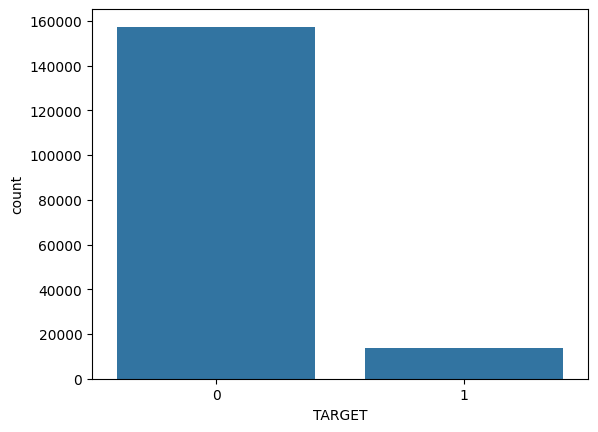

In [27]:
# The distribution of the target (default or not)
sns.countplot(data=train, x="TARGET")
plt.show()

We can see that the **distribution of the objective variable is highly skewed**. Data in which the distribution of the objective variable is highly skewed in this way is called **unbalanced data**.

When dealing with unbalanced data, we need to be particularly careful in selecting evaluation metrics. For example, if you choose accuracy, you will find that simply predicting all zeros will result in a high accuracy. **Choosing such an inappropriate metric can cause the machine learning model to fail to predict well on new data**.

Another approach to dealing with unbalanced data is to try to balance the distribution of the target variable. The method of reducing the data of the larger target variable is called undersampling, while the method of increasing the data of the smaller objective variable is called oversampling.

**Findings**:<br>
* (May) need to think about methods to mitigate the skewedness of the target variable

#### NAME_CONTRACT_TYPE column

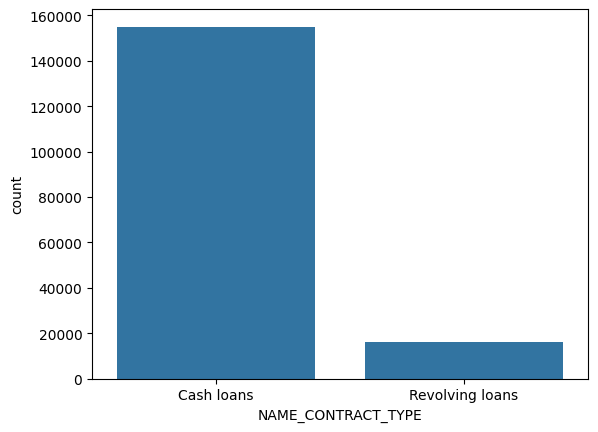

In [28]:
# The distribution of NAME_CONTRACT_TYPE
sns.countplot(data=train, x="NAME_CONTRACT_TYPE")
plt.show()

There are two variables in `NAME_CONTRACT_TYPE`, Cash loans and Revolving loans, but they are not evenly distributed. Also, since the machine learning model can only handle data of numeric type, it is necessary to convert the data from string type to numeric type.

**Findings**:<br>
* (May) need to think about methods to mitigate the skewedness of the target variable
* Need to convert the data from string type to numeric type

#### ORGANIZATION_TYPE column

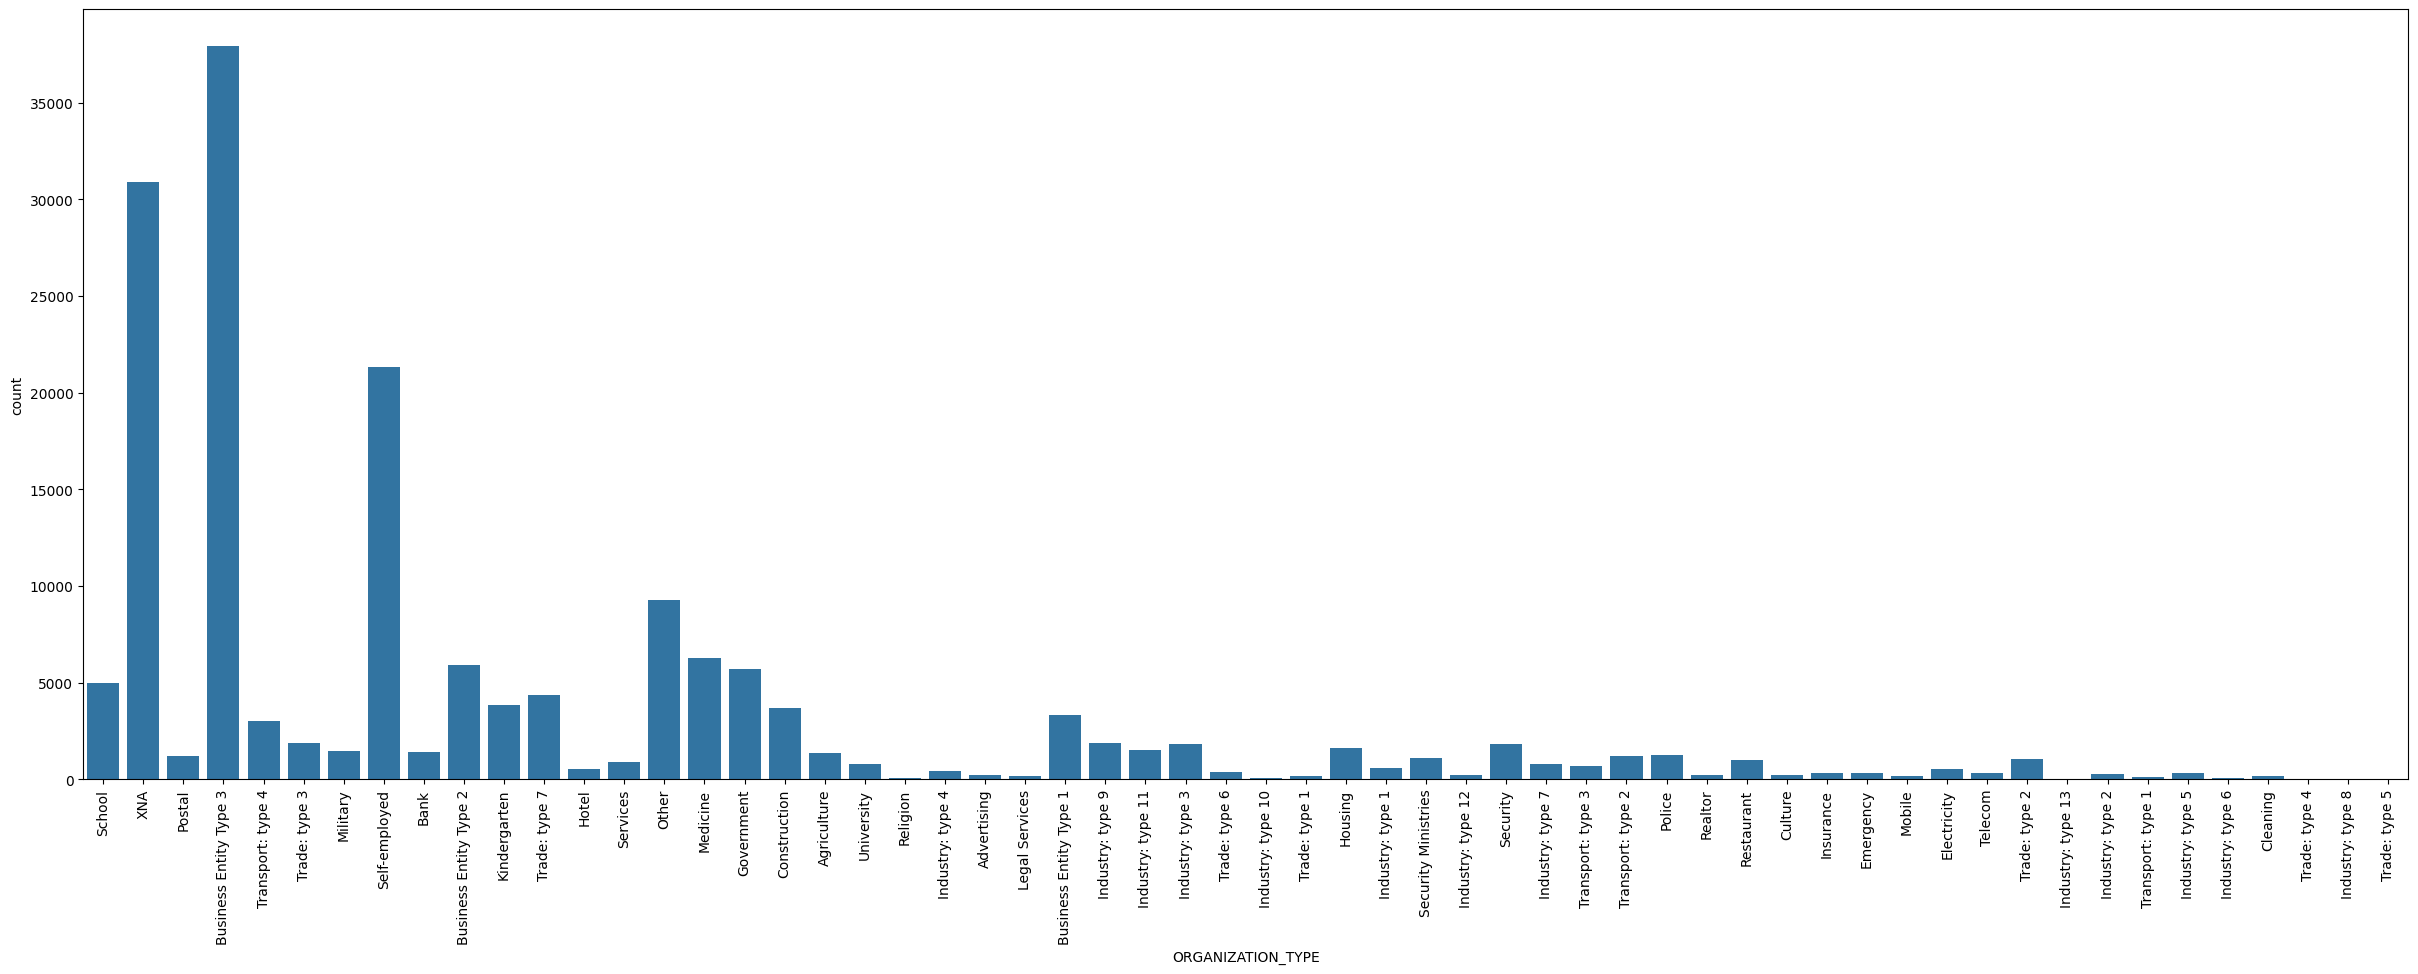

In [29]:
# The distribution of ORGANIZATION_TYPE
plt.figure(figsize=(30, 10))
sns.countplot(data=train, x="ORGANIZATION_TYPE")
plt.tick_params(axis="x", rotation=90)
plt.show()

There are many different `ORGANIZATION_TYPE`s, and you can also see that there is an ununiformity in the number of data. This is also a string type feature, so it needs to be converted to a numeric type. Also, the second variable from the left is "XNA", which we can infer from its name to be a missing value.


**Findings**:<br>
* Treat "XNA" as missing values
* Need to convert the data from string type to numeric type

#### EXT_SOURCE_2 column

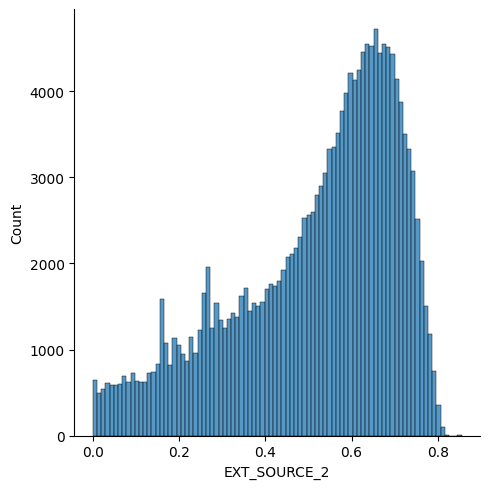

In [30]:
# The distribution of EXT_SOURCE_2
sns.displot(data=train, x="EXT_SOURCE_2")
plt.show()

We can see that EXT_SOURCE_2 is normalized between 0 and 1. It seems we can handle this feature as it is.

**Findings**:<br>
* No additional preprocessing is needed

#### AMT_INCOME_TOTAL column

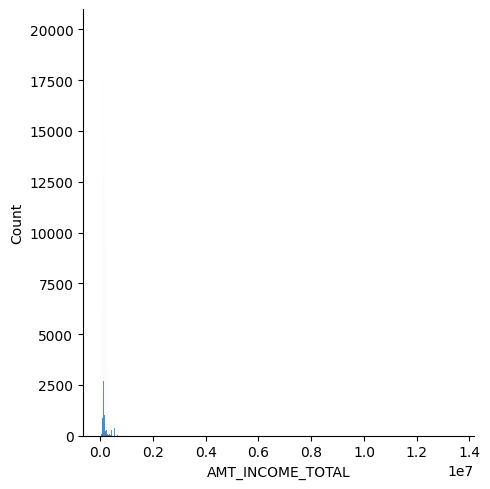

In [31]:
# The distribution of AMT_INCOME_TOTAL
sns.displot(data=train, x="AMT_INCOME_TOTAL")
plt.show()

The visualization of `AMT_INCOME_TOTAL` is hard to interpret. THis may be caused by the presence of a small number of outliers that take large values. To visualize data like this, a logarithmic transformation can be effective.

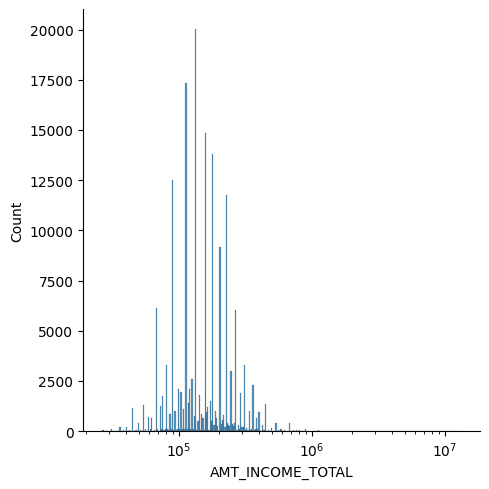

In [32]:
# The distribution of AMT_INCOME_TOTAL（Logarithmic transformation）
sns.displot(data=train, x="AMT_INCOME_TOTAL", log_scale=10)
plt.show()

We displayed the graph successfully by using logarithmic transformation.
The income is supposed to be a continuous value, but it looks like a discrete value. Let's have a look at the type of `AMT_INCOME_TOTAL` values.

In [33]:
# Check the type of AMT_INCOME_TOTAL values
len(train["AMT_INCOME_TOTAL"].unique())

1641

There are 171202 data in train, but `AMT_INCOME_TOTAL` consists of only 1641 different values. Let's check the top 10 values specifically.

In [34]:
# Top 10 values of AMT_INCOME_TOTAL
train["AMT_INCOME_TOTAL"].value_counts().head(10)

,count
AMT_INCOME_TOTAL,
135000.0,19969
112500.0,17320
157500.0,14772
180000.0,13791
90000.0,12481
225000.0,11573
202500.0,9128
67500.0,6130
270000.0,6006


It appears that `AMT_INCOME_TOTAL` is not an exact annual income, but rather data compiled from a rounded number.

**Findings**:<br>
* Should the outlier in the data be addressed?

#### OWN_CAR_AGE column

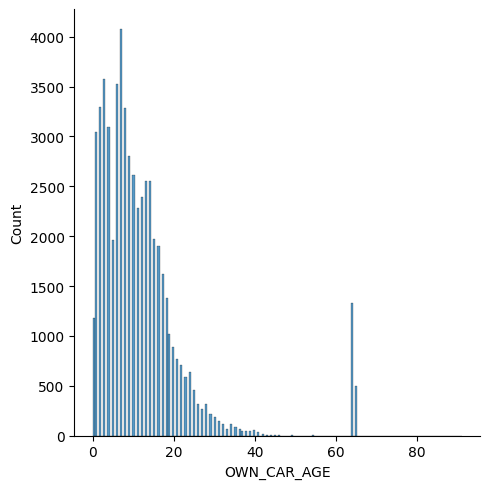

In [35]:
# The distribution of OWN_CAR_AGE
sns.displot(data=train, x="OWN_CAR_AGE")
plt.show()

`OWN_CAR_AGE` can be inferred to be in years from the scale of values. In addition, the distribution is natural from 0 to 40, but there is an unnatural distribution around 60 to 70. It is hard to imagine that the number of years a car has been purchased increases suddenly like this, so they are considered to be outliers.

**Findings**:<br>
* Treat numbers above 60 as outliers

Up to this point, we have visualized and analyzed each feature. I believe that you have realized that visualization requires some ingenuity and that visualization can deepen your understanding of data. I am sure that the visualization and analysis of the 25 features not covered here will lead to improved forecasting accuracy.

### **[Next Steps]**
> + Check for missing values for the features you have added in Section 2.2.
> + Visualize the features you have added. Is the feature categorical or continuous? What type of graph is most effective to understand it?
> + What do you notice about the features? What kind of preprocessing is needed?

## 4.Preprocessing and Feature Creation
Here, we will conduct the preprocessing and create new features based on what we have learned in the preceding visualization and analysis.

### NAME_CONTRACT_TYPE column
Convert `NAME_CONTRACT_TYPE` to a numeric type. In this case, “Cash loans” is converted to 0 and “Revolving loans” to 1. This method of simply replacing an integer is called **Label Encoding**.

In [36]:
# Numerization of NAME_CONTRACT_TYPE（Label Encoding）
train["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)
test["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)

train.head(5)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,OWN_CAR_AGE,ORGANIZATION_TYPE,TARGET
0,0,112500.0,0.372591,NaN,School,0
1,0,225000.0,0.449567,NaN,XNA,0
2,0,54000.0,0.569503,NaN,Postal,0
3,0,67500.0,0.105235,NaN,XNA,0
4,0,157500.0,0.202490,NaN,Business Entity Type 3,1


### ORGANIZATION_TYPE column
Convert `ORGANIZATION_TYPE` to a numeric type. This time, we will convert the variable to numeric in terms of the number of data in the variable. For example, if the number of data in “Police” is 1279 and the number of data in “Bank” is 1385, convert “Police” to 1279 and “Bank” to 1385. This method of replacing the number of data with the number of data is called **Count Encoding**.

In [37]:
# Numerization of ORGANIZATION_TYPE (Count Encoding）
organization_ce = train["ORGANIZATION_TYPE"].value_counts()
train["ORGANIZATION_TYPE"] = train["ORGANIZATION_TYPE"].map(organization_ce)
test["ORGANIZATION_TYPE"] = test["ORGANIZATION_TYPE"].map(organization_ce)

train.head(5)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,OWN_CAR_AGE,ORGANIZATION_TYPE,TARGET
0,0,112500.0,0.372591,NaN,4991,0
1,0,225000.0,0.449567,NaN,30898,0
2,0,54000.0,0.569503,NaN,1185,0
3,0,67500.0,0.105235,NaN,30898,0
4,0,157500.0,0.202490,NaN,37943,1


### EXT_SOURCE_2 column
Fill missing values in `EXT_SOURCE_2`. There are various methods for completing missing values, but in this case, since the number of missing values is small, we simply use the average value to complete the missing values.

**IMPORANT**:
When you fill the missing values in the test data, you need to **fill with the average of the train data**.

In [38]:
# Complete missing values of EXT_SOURCE_2 with the average
train["EXT_SOURCE_2"].fillna(train["EXT_SOURCE_2"].mean(), inplace=True)
test["EXT_SOURCE_2"].fillna(train["EXT_SOURCE_2"].mean(), inplace=True) # Use average of train data to fill test data

train.isnull().sum()

,0
NAME_CONTRACT_TYPE,0
AMT_INCOME_TOTAL,0
EXT_SOURCE_2,0
OWN_CAR_AGE,112992
ORGANIZATION_TYPE,0
TARGET,0


### OWN_CAR_AGE column
First, we will replace the unnatural outliers that are over 60 as `np.nan` (missing values).

In [39]:
# Treat values above 60 (outliers) in OWN_CAR_AGE as missing values
train.loc[train["OWN_CAR_AGE"] >= 60, "OWN_CAR_AGE"] = np.nan
test.loc[test["OWN_CAR_AGE"] >= 60, "OWN_CAR_AGE"] = np.nan

Next, we consider the handling of missing values. The original `OWN_CAR_AGE` had 112992 missing values out of 171202 data. With such a large number of missing values, it is difficult and impractical to properly fill the missing values with some value. Therefore, we will group `OWN_CAR_AGE` by decade (e.g. Group 1: 0-9 years, Group 2: 10-19 years, etc.), then apply **One Hot Encoding**.

In [40]:
# Divide OWN_CAR_AGE into groups
train["OWN_CAR_AGE"] = train["OWN_CAR_AGE"] // 10
test["OWN_CAR_AGE"] = test["OWN_CAR_AGE"] // 10

train["OWN_CAR_AGE"].unique()

array([nan,  0.,  2.,  1.,  3.,  4.,  5.])

In [41]:
# Apply One Hot Encoding to OWN_CAR_AGE
train_car_age_ohe = pd.get_dummies(train["OWN_CAR_AGE"]).add_prefix("OWN_CAR_AGE_")
test_car_age_ohe = pd.get_dummies(test["OWN_CAR_AGE"]).add_prefix("OWN_CAR_AGE_")

# Add the one hot encoded columns to train/test
train = pd.concat([train, train_car_age_ohe], axis=1)
test = pd.concat([test, test_car_age_ohe], axis=1)

# Remove original OWN_CAR_AGE
train.drop('OWN_CAR_AGE', axis=1, inplace=True)
test.drop('OWN_CAR_AGE', axis=1, inplace=True)

train.head(5)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,ORGANIZATION_TYPE,TARGET,OWN_CAR_AGE_0.0,OWN_CAR_AGE_1.0,OWN_CAR_AGE_2.0,OWN_CAR_AGE_3.0,OWN_CAR_AGE_4.0,OWN_CAR_AGE_5.0
0,0,112500.0,0.372591,4991,0,False,False,False,False,False,False
1,0,225000.0,0.449567,30898,0,False,False,False,False,False,False
2,0,54000.0,0.569503,1185,0,False,False,False,False,False,False
3,0,67500.0,0.105235,30898,0,False,False,False,False,False,False
4,0,157500.0,0.202490,37943,1,False,False,False,False,False,False


### **[Next Steps]**
> + Apply preprocessing to the features you added. Is it correctly preprocessed?
> + Explore other preprocessing methods to apply to the features.
> + If you have errors, try reloading the dataset by going back to [Section 2.1](#scrollTo=2TTHzi1c3a5E&line=5&uniqifier=1).

## 5.Building the Machine Learning Model
Now, we are ready to start building the machine learning model.

### 5.1 Import Additional Libraries
First, we import the necessary libraries for training and evaluation.

- `train_test_split`: Split data into training and evaluation data.
- `StandardScaler`: Standardize the data.
- `roc_auc_score`: Calculate ROC-AUC, the evaluation metric for this competition.

In [42]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

### 5.2 Preparing the Data
Split the data into explanatory and target variables. The target variable for this dataset is `TARGET` column and the rest are explanatory variables.

In [43]:
# Split the data into explanatory and target variables
X = train.drop("TARGET", axis=1).values
y = train["TARGET"].values
X_test = test.values

Standardize the data. Standardization is the operation of transforming the values so that the mean is 0 and the variance is 1. Some models, such as logistic regression and neural networks, do not learn well without scaling the values in this way.

In [44]:
# Standardization
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_test_std = sc.transform(X_test)

### 5.3 Training the Model
We first split the training data into training data and validation data. This method of keeping a portion of the training data for evaluation and not using it for training is called the **holdout method**. This is one method to approximate the model's predictive ability on unknown data (**generalization** performance).

Here, we will use 70% of the data as training data and 30% as validation data

In [45]:
# Split the original data into the training data and the validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=0)

Now, let's create models with logistic regression and random forest.

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

lr_train_pred = lr.predict_proba(X_train)[:, 1]
lr_valid_pred = lr.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lr_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lr_valid_pred)}")

Train Score: 0.6617294708792993
Valid Score: 0.6630713164150057


In [47]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, max_depth=10)
rf.fit(X_train, y_train)

rf_train_pred = rf.predict_proba(X_train)[:, 1]
rf_valid_pred = rf.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, rf_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, rf_valid_pred)}")

Train Score: 0.7355588439921132
Valid Score: 0.668766231838948


We find that random forest results with higher validation score.

### 5.4 (Optional) Ensemble Learning
Now that we have created two models, we can try combining these two models for better predictive ability (**ensemble learning**). There are various methods for ensemble learning, but here we will simply take the average of the two models.

In [48]:
train_pred = (lr_train_pred + rf_train_pred) / 2
valid_pred = (lr_valid_pred + rf_valid_pred) / 2

print(f"Train Score: {roc_auc_score(y_train, train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, valid_pred)}")

Train Score: 0.708156708403541
Valid Score: 0.6685983880023738


We find that in this case, ensemble leaning does not contribute to improved score. So, **we will use the random forest model as the final model to make predictions on the test data**.

### **[Next Steps]**
> + Is holdout method the best method to evaluate your model?
> + Is the model's hyperparameters optimized? What hyperparameters needs tuning?
> + Explore other models to use to make predictions.
> + Explore other ensembling methods to further improve the model's performance.
> + If you have errors, try reloading the dataset by going back to [Section 2.1](#scrollTo=2TTHzi1c3a5E&line=5&uniqifier=1).

## 6.Creating Prediction Results
Finally, let's make a prediction for the test data, and prepare a CSV file to submit.

### 6.1 Predicting on the test data
We found in Sections 5.3 and 5.4 that the best model was random forest model. Therefore, we will use this model to make the final prediction.

If you made any changes and found a better model, you will need to change the code below accordingly.

```python
# If logistic regression model was better
pred = lr.predict_proba(X_test_std)[:, 1]
```

In [49]:
# Make predictions for the test data
# Change model name if needed
pred = rf.predict_proba(X_test_std)[:, 1]

### 6.2 Saving the prediction as CSV file [DO NOT CHANGE]
**WARNING**: DO **NOT** CHANGE THE CODES BELOW!!!

In [50]:
# Put the prediction into the format of submission
sample_sub['TARGET'] = pred
sample_sub

,SK_ID_CURR,TARGET
0,171202,0.047952
1,171203,0.118587
2,171204,0.118912
3,171205,0.061402
4,171206,0.098342
...,...,...
61495,232697,0.258829
61496,232698,0.059181
61497,232699,0.092243
61498,232700,0.139386


In [51]:
# Create the "output" directory if it doesn't exist
output_dir = current_dir / "output"
os.makedirs(output_dir, exist_ok=True)

# Specify the new output file path
output_file = output_dir / "submission.csv"

# Save the CSV file to the "output" directory
sample_sub.to_csv(output_file, index=False)

That's all for the tutorial of Home Credit Default Risk competition! Submit your CSV file to Omnicampus to see the result.

Only 5 out of 30 features are covered in this notebook, so there are a lot of room for improvement. Check out **[Next Steps]** in each section to see what you can do to improve your score.